LSTM model is used to analyze time series data for Accessories product category 

In [129]:
pip install keras

  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [131]:
pip install tensorflow

  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl (276.5 MB)
     ------------------------------------- 430.4/430.4 kB 13.6 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.57.0-cp310-cp310-win_amd64.whl (4.3 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.7.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth-2.22.0-py2.py3-none-any.whl (181 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached rsa-4.9-py3-none

In [3]:
import numpy as np
import pandas as pd

In [17]:
data1=pd.read_csv('Accessories_data.csv')


In [18]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1.set_index('Date', inplace=True)


In [19]:
data1.head()

,Revenue
Date,
2013-07-31,229.807799
2013-08-31,224.693885
2013-09-30,233.296254
2013-10-31,216.187654
2013-11-30,221.223651


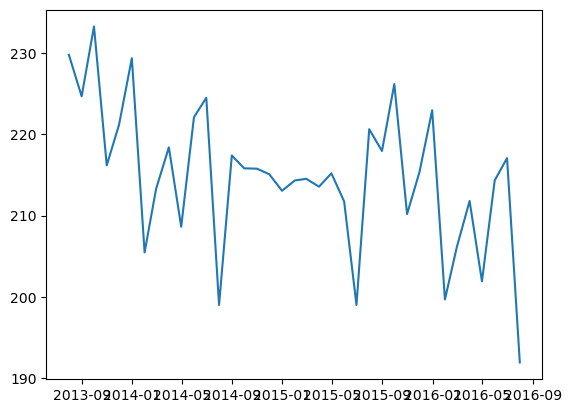

In [20]:
import matplotlib.pyplot as plt

plt.plot(data1)

Code3

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Load your time series data
data2 = pd.read_csv('Accessories_data.csv', parse_dates=['Date'], index_col='Date')
y = data2['Revenue']  # Replace 'Revenue' with the appropriate column name

# Split data into train and validation sets
train_size = int(0.8 * len(y))
train, validation = y[:train_size], y[train_size:]

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
validation_scaled = scaler.transform(validation.values.reshape(-1, 1))

# Function to create and train an LSTM model
def create_lstm_model(input_shape, lstm_units, dense_units, learning_rate):
    model = Sequential()
    model.add(LSTM(units=lstm_units, input_shape=input_shape))
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dense(units=1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Hyperparameters to tune
lstm_units_range = [50, 100, 150]
dense_units_range = [10, 20, 30]
learning_rate_range = [0.001, 0.01, 0.1]

# Iterate over hyperparameters
best_mse = float('inf')
best_hyperparameters = None

for lstm_units in lstm_units_range:
    for dense_units in dense_units_range:
        for learning_rate in learning_rate_range:
            input_shape = (train_scaled.shape[1], 1)
            model = create_lstm_model(input_shape, lstm_units, dense_units, learning_rate)
            model.fit(train_scaled, train_scaled, epochs=50, batch_size=16, verbose=0)
            
            # Make predictions on validation data
            validation_pred_scaled = model.predict(validation_scaled)
            # Inverse transform predictions to original scale
            validation_pred = scaler.inverse_transform(validation_pred_scaled)
            

            # Calculate Mean Squared Error
            mse = mean_squared_error(validation, validation_pred)
            
            # Print results
            print(f"LSTM Units: {lstm_units}, Dense Units: {dense_units}, Learning Rate: {learning_rate}")
            print(f"Mean Squared Error: {mse}\n")
            
            # Update best hyperparameters if necessary
            if mse < best_mse:
                best_mse = mse
                best_hyperparameters = (lstm_units, dense_units, learning_rate)

print("Best Hyperparameters:", best_hyperparameters)
print("Best Mean Squared Error:", best_mse)


1/1 [==============================] - 1s 533ms/step
LSTM Units: 50, Dense Units: 10, Learning Rate: 0.001
Mean Squared Error: 34.37127417464329

1/1 [==============================] - 0s 443ms/step
LSTM Units: 50, Dense Units: 10, Learning Rate: 0.01
Mean Squared Error: 2.4807938425203724

1/1 [==============================] - 0s 345ms/step
LSTM Units: 50, Dense Units: 10, Learning Rate: 0.1
Mean Squared Error: 6.433710872289833

1/1 [==============================] - 0s 377ms/step
LSTM Units: 50, Dense Units: 20, Learning Rate: 0.001
Mean Squared Error: 37.19134118549206

1/1 [==============================] - 0s 377ms/step
LSTM Units: 50, Dense Units: 20, Learning Rate: 0.01
Mean Squared Error: 0.3627753529619117

1/1 [==============================] - 0s 360ms/step
LSTM Units: 50, Dense Units: 20, Learning Rate: 0.1
Mean Squared Error: 3.6314264689857043

1/1 [==============================] - 0s 436ms/step
LSTM Units: 50, Dense Units: 30, Learning Rate: 0.001
Mean Squared Error: 

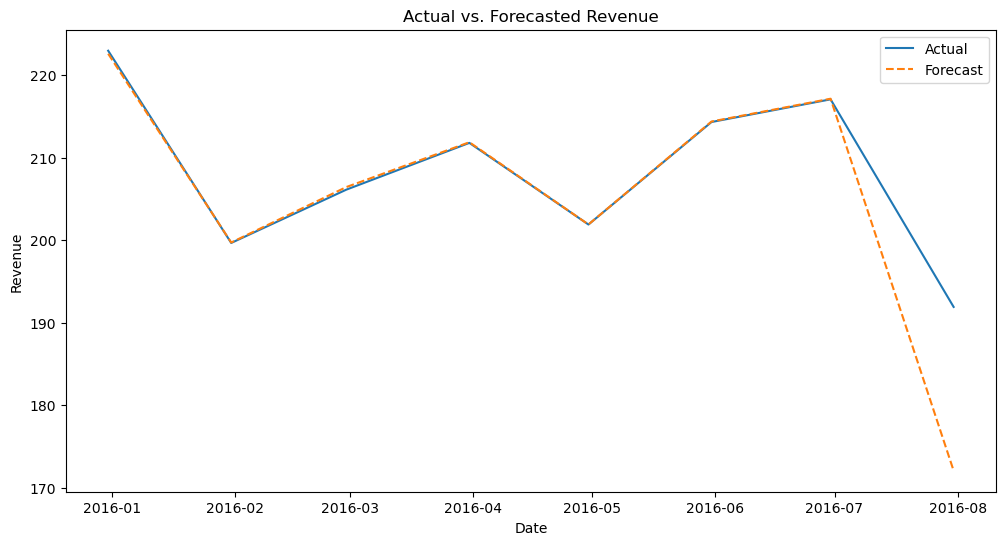

In [13]:

# Visualize actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(validation.index, validation, label='Actual')
plt.plot(validation.index, validation_pred, label='Forecast', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Actual vs. Forecasted Revenue')
plt.legend()
plt.show()